,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Columns with more than 5% missing values:


Comments    525600
dtype: int64

Missing values in key columns:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Number of outlier rows detected: 7740


C:\Users\sciec\AppData\Local\Temp\ipykernel_21944\2865955445.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\sciec\AppData\Local\Temp\ipykernel_21944\2865955445.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Cleaned data saved to data/benin_clean.csv


C:\Users\sciec\Desktop\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


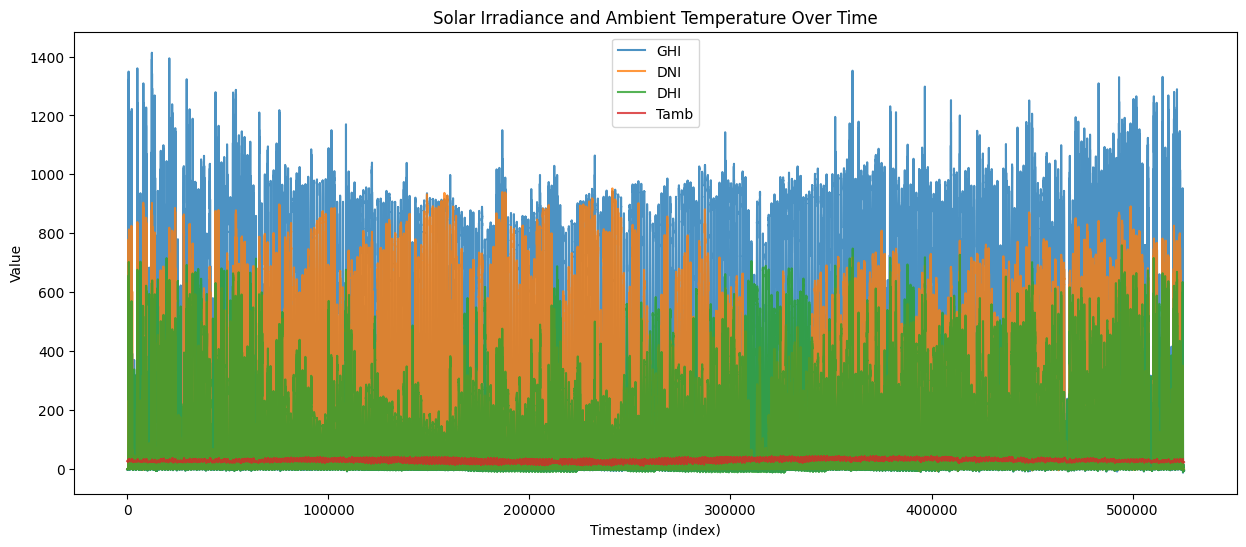

C:\Users\sciec\AppData\Local\Temp\ipykernel_21944\2865955445.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_ghi.index, y=monthly_ghi.values, palette='viridis')


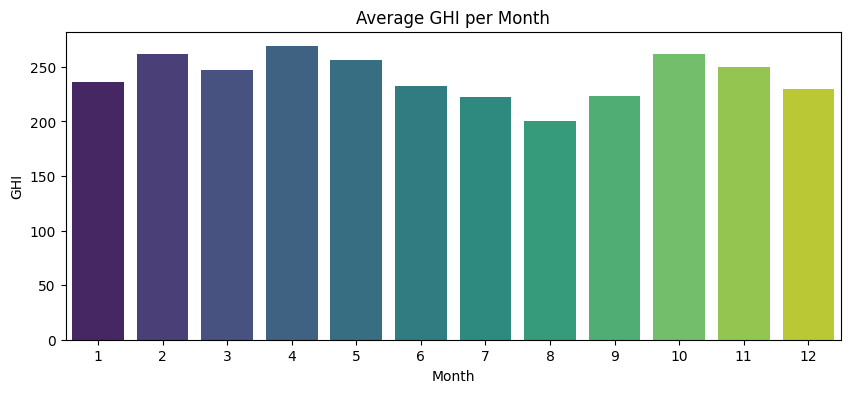

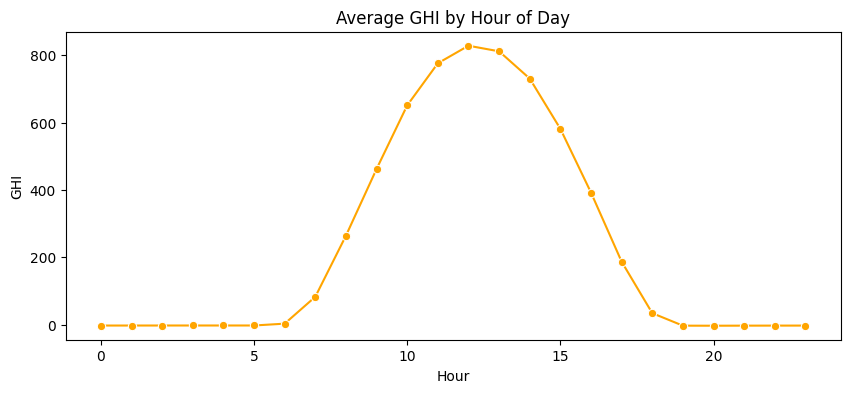

Average ModA & ModB pre/post-clean:


,ModA,ModB
Cleaning,,
0,236.524253,228.816071
1,307.229278,301.972165


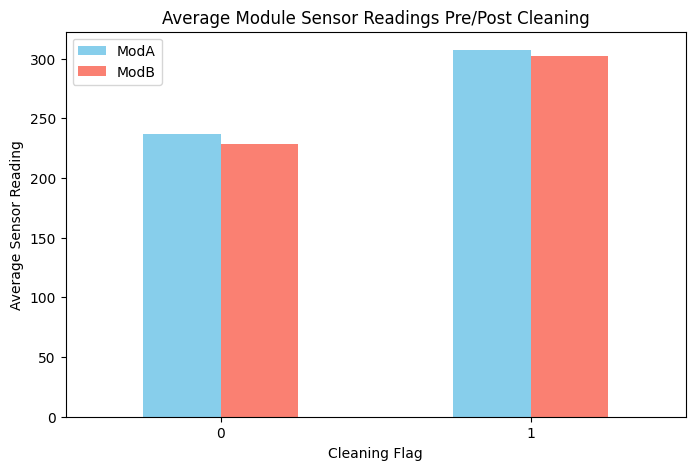

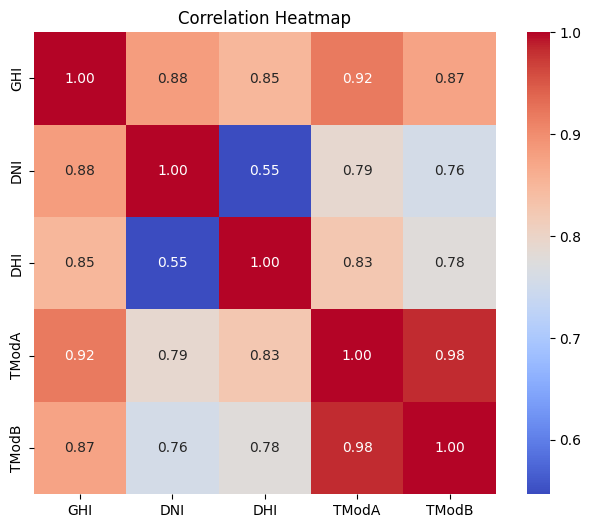

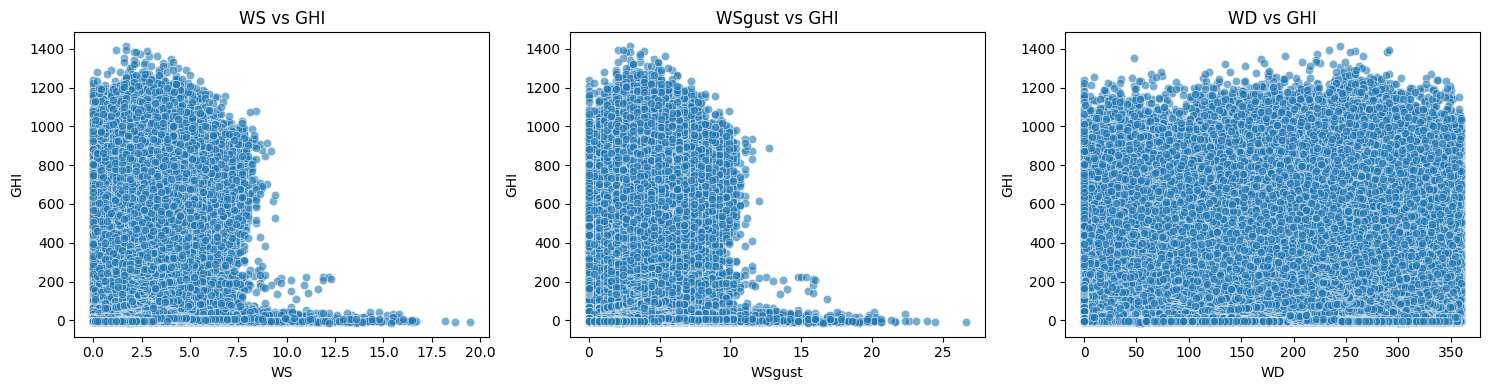

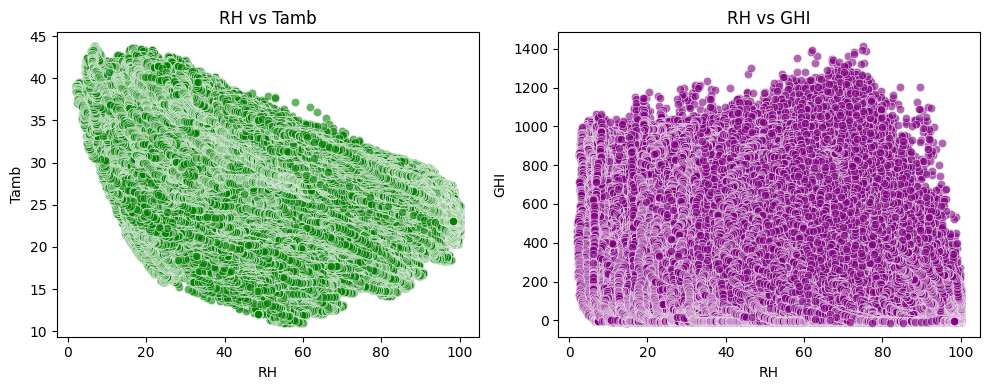

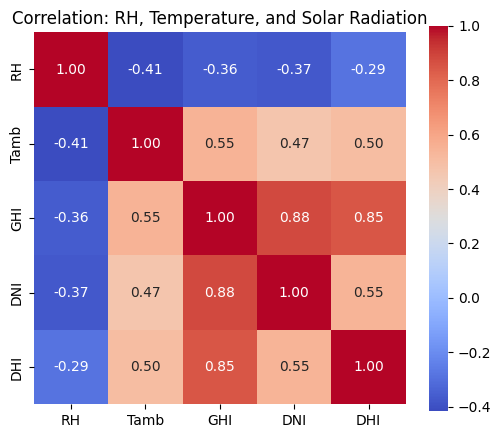

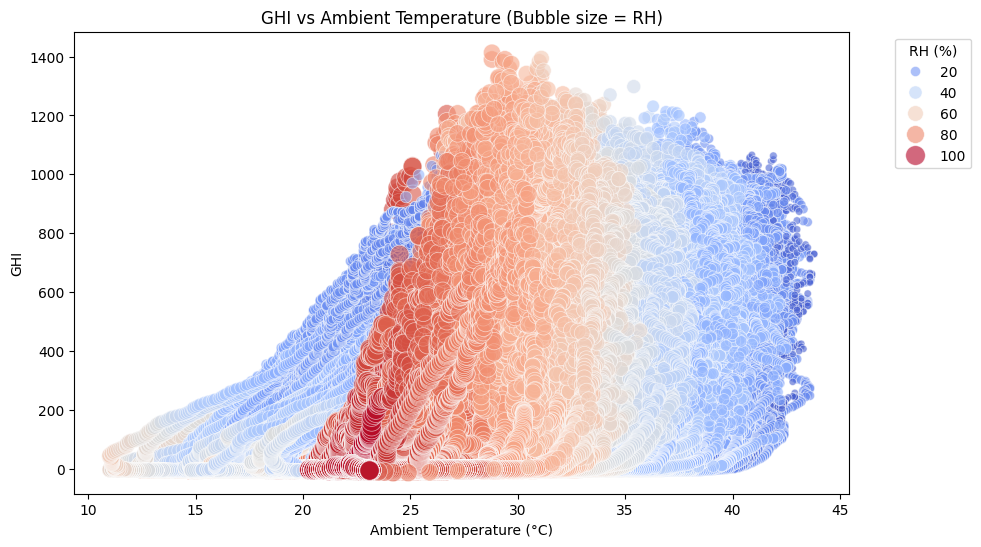

In [4]:
# <benin-malanville>_eda.ipynb

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Step 2: Load your CSV file
file_path = r"C:\Users\sciec\Desktop\data\benin-malanville.csv"
df = pd.read_csv(file_path)

# Preview the data
df.head()

# Step 3: Summary Statistics & Missing Values
numeric_summary = df.describe()
display(numeric_summary)

# Missing value analysis
missing_values = df.isna().sum()
missing_threshold = 0.05 * len(df)
columns_with_missing = missing_values[missing_values > missing_threshold]

print("Columns with more than 5% missing values:")
display(columns_with_missing)
# Step 4: Outlier Detection & Basic Cleaning
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_in_key = df[key_columns].isna().sum()
print("Missing values in key columns:\n", missing_in_key)

# Compute Z-scores for outlier detection
z_scores = np.abs(stats.zscore(df[key_columns], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)
outliers = df[outlier_mask]
print(f"Number of outlier rows detected: {outliers.shape[0]}")

# Fill missing values with median
for col in key_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Optional: Drop outliers
# df = df[~outlier_mask]

# Save cleaned CSV
os.makedirs('data', exist_ok=True)
cleaned_file = "data/benin_clean.csv"
df.to_csv(cleaned_file, index=False)
print(f"Cleaned data saved to {cleaned_file}")
# Step 5: Time Series Analysis
plt.figure(figsize=(15,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    if col in df.columns:
        plt.plot(df.index, df[col], label=col, alpha=0.8)
plt.title('Solar Irradiance and Ambient Temperature Over Time')
plt.xlabel('Timestamp (index)')
plt.ylabel('Value')
plt.legend()
plt.show()

# If timestamp column exists, convert and analyze
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.set_index('Timestamp')
    df['Month'] = df.index.month
    df['Hour'] = df.index.hour

    # Monthly GHI
    monthly_ghi = df.groupby('Month')['GHI'].mean()
    plt.figure(figsize=(10,4))
    sns.barplot(x=monthly_ghi.index, y=monthly_ghi.values, palette='viridis')
    plt.title('Average GHI per Month')
    plt.xlabel('Month')
    plt.ylabel('GHI')
    plt.show()

    # Hourly GHI
    hourly_ghi = df.groupby('Hour')['GHI'].mean()
    plt.figure(figsize=(10,4))
    sns.lineplot(x=hourly_ghi.index, y=hourly_ghi.values, marker='o', color='orange')
    plt.title('Average GHI by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('GHI')
    plt.show()

# Step 6: Cleaning Impact
if 'Cleaning' in df.columns:
    cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    print("Average ModA & ModB pre/post-clean:")
    display(cleaning_group)
    cleaning_group.plot(kind='bar', figsize=(8,5), color=['skyblue','salmon'])
    plt.title('Average Module Sensor Readings Pre/Post Cleaning')
    plt.xlabel('Cleaning Flag')
    plt.ylabel('Average Sensor Reading')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Warning: 'Cleaning' column not found.")

# Step 7: Correlation & Relationship Analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
available_corr_cols = [col for col in corr_columns if col in df.columns]
if available_corr_cols:
    corr_matrix = df[available_corr_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Scatter WS, WSgust, WD vs GHI
wind_columns = ['WS', 'WSgust', 'WD']
plt.figure(figsize=(15,4))
for i, col in enumerate(wind_columns):
    if col in df.columns:
        plt.subplot(1, 3, i+1)
        sns.scatterplot(x=df[col], y=df['GHI'], alpha=0.6)
        plt.xlabel(col)
        plt.ylabel('GHI')
        plt.title(f'{col} vs GHI')
plt.tight_layout()
plt.show()

# RH vs Tamb & GHI
if {'RH', 'Tamb', 'GHI'}.issubset(df.columns):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.scatterplot(x=df['RH'], y=df['Tamb'], alpha=0.6, color='green')
    plt.xlabel('RH')
    plt.ylabel('Tamb')
    plt.title('RH vs Tamb')

    plt.subplot(1,2,2)
    sns.scatterplot(x=df['RH'], y=df['GHI'], alpha=0.6, color='purple')
    plt.xlabel('RH')
    plt.ylabel('GHI')
    plt.title('RH vs GHI')
    plt.tight_layout()
    plt.show()

# Step 8: Temperature Analysis
required_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
if all(col in df.columns for col in required_cols):
    temp_corr = df[required_cols].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(temp_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation: RH, Temperature, and Solar Radiation')
    plt.show()

# Step 9: Bubble Chart (GHI vs Tamb with RH as bubble size)
if {'GHI', 'Tamb', 'RH'}.issubset(df.columns):
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Tamb',
        y='GHI',
        size='RH',
        sizes=(20, 200),
        hue='RH',
        palette='coolwarm',
        alpha=0.6
        )
    plt.title('GHI vs Ambient Temperature (Bubble size = RH)')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('GHI')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='RH (%)')
    plt.show()